In [70]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [38]:
import pandas as pd
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
import pandas as pd
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [40]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [41]:
df['Dependents']=df['Dependents'].str.replace('+','')

In [42]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [43]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [44]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [45]:
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [88]:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [66]:
print (y.value_counts())
print (y_bal.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


NameError: name 'y_bal' is not defined

In [68]:
import pandas as pd
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,614.000000
mean,5403.459283,1621.245798,145.465798,342.00000,0.855049
std,6109.041673,2926.248369,84.180967,65.12041,0.352339
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


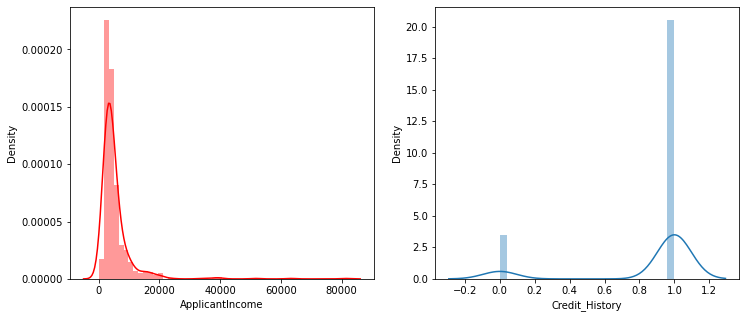

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


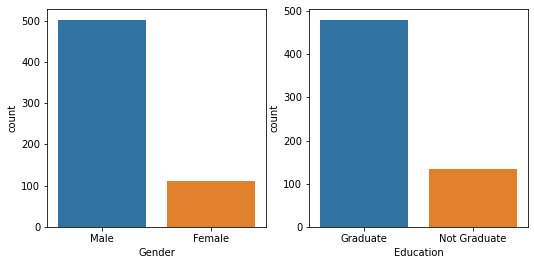

In [72]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(df['Gender'])
plt.subplot(1,4,2)
sns.countplot(df['Education'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

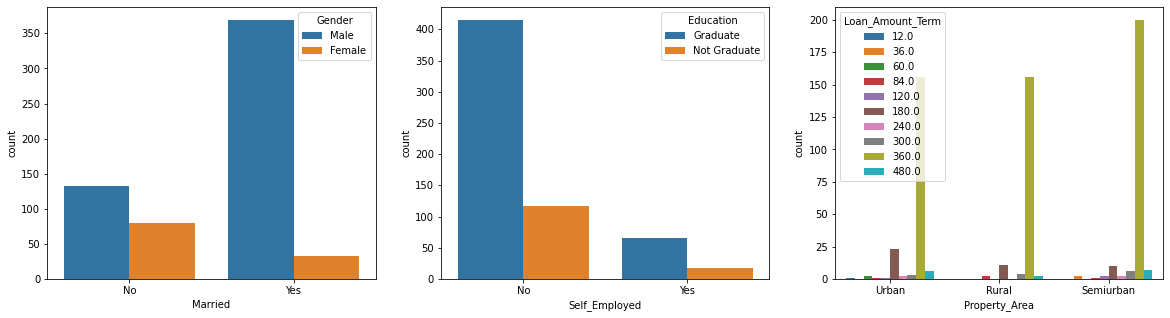

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(df['Married'], hue=df['Gender'])
plt.subplot(132)
sns.countplot(df['Self_Employed'], hue=df['Education'])
plt.subplot(133)
sns.countplot(df['Property_Area'], hue=df['Loan_Amount_Term'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

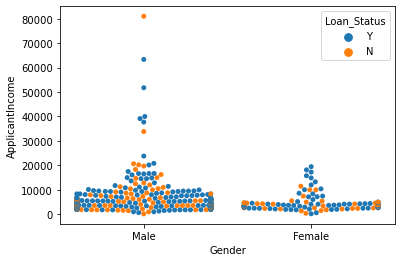

In [77]:
import seaborn as sns
sns.swarmplot(df['Gender'],df['ApplicantIncome'], hue = df['Loan_Status'])

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.33, random_state=42) 

In [11]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    ypred = dt.predict(x_test)
    print('***DescisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [12]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    ypred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [13]:
def KNN(x_train, x_test, y_train, y_test):
    knn = kneighborsClassifier()
    knn.fit(x_train,y_train)
    ypred = knn,predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [14]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    ypred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

In [ ]:
rfr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

In [ ]:
knn.predict([[1,1, 0, 1, 1,4276, 1542,145, 240, 0,1]])

In [ ]:
xgb.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

In [ ]:
classifier.save("loan.h5")

In [ ]:
    y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred = (y_pred > 0.5)

In [99]:
def predict_exit(sample_value):
    
    sample_value = np.array(sample_value)
    
    sample_value = sample_value.reshape(1, -1)
    
    sample_value = sc.transform(sample_value)
    
    return classifier.predict(sample_value)

In [3]:
def predict_exit(sample_value):
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]]
if predict_exit(sample_value)>0.5:
    print('Prediction: High chance of Loan Approval!')
else:
    print('Prediction: Low chance Loan Approval.')

IndentationError: expected an indented block (<ipython-input-3-f3cef57823c2>, line 2)

In [ ]:
    def compareModel(X_train,X_test,y_train,y_test):
        decisionTree(X_train,X_test,y_train,y_test)
        print('-'*100)
        RandomForest(X_train,X_test,y_train,y_test)
        print('-'*100)
        XGB(X_train,X_test,y_train,y_test)
        print('-'*100)
        KNN(X_train,X_test,y_train,y_test)
        print('-'*100)

In [1]:
def compareModel(X_train,X_test,y_train,y_test):
CompareModel(X_train,x_test,y_train,y_test)

IndentationError: expected an indented block (<ipython-input-1-1896aa5ccd4a>, line 2)

In [102]:
from sklearn.model_selection import cross_val_score

In [105]:
0.9679166666666668

0.9679166666666668

In [6]:
cv = cross_val_score(rf,x,y,cv=5)

NameError: name 'rf' is not defined

In [7]:
np.mean(cv)

NameError: name 'np' is not defined

In [108]:
0.985

0.985